### Exercise 3: Intro to A/B Testing
- Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360
- Read the Study Overview and explain what the goal of the trial is 
- Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions. 
- Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table. These are the data for this exercise.
- What is the difference in surival rates between the invasive strategy and the conservative strategy?
- Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another
- Bootstrap the difference in surival rates, and plot it as a KDE and ECDF
- Is this an effective health intervention? Explain your answer clearly

This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)



**Hannah Egl is working on this on branch hannah_egl**

ANSWER

The goal of the trial is to establish the "best management strategy" for patients with SIHD. The strategies being compared are an invasive approach and a conservative approach. It also hopes to compare quality of life outcomes for patient symptoms. 

Study Plan Design:

The study is designed as a randomized intervention model with parallel assignment with the "main ISCHEMIA trial". It is measuring incidence of death (from any cause) as well as comulative event rate of death (also from any cause). This allows them to measure the instance of death as well as the probability of death. The study is randomized to minimize the effects of extraneous variables on the measured outcomes. 

Table 1 is a contigency table because it measures time frame for incidence of death against the treatment group assignment.

Participants who received the invasive treatment had a 36.4% rate of death from any cause or myocardial infarction while those with the conservative strategy had a rate of 36.7%. Both of these used a 95% confidence interval.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [31]:
""" 
survival=1
death=0

IT= "invasive treatment"
CT= "conservative treatment"


"""



' \nsurvival=1\ndeath=0\n\nIT= "invasive treatment"\nCT= "conservative treatment"\n\n\n'

In [13]:
CT_Arr= [1]* surv_count_CT + [0]*(389-surv_count_CT)
IT_Arr= [1]* surv_count_IT + [0]*(388-surv_count_IT)

CT_Series=pd.Series(CT_Arr)
IT_Series=pd.Series(IT_Arr)
CT_Series

0      1
1      1
2      1
3      1
4      1
      ..
384    0
385    0
386    0
387    0
388    0
Length: 389, dtype: int64

In [8]:
surv_rate_IT= (1-.364)
surv_rate_CT= (1-.367)

surv_count_IT= int(surv_rate_IT*388)
surv_count_CT= int(surv_rate_CT*389)

survival_IT=1
survival_CT=1

n_IT=388
n_CT=389

surv_count_IT/388, surv_count_CT/389

(0.634020618556701, 0.6323907455012854)

In [21]:
# Bootstrap the IT Survival Rates

def simulate(my_series, S=1000):
    x=my_series

    estimates=[]
    for s in range (S):
        x_s = x.sample(frac=1.0, replace=True)
        stat_s=sum(x_s)/len(x_s)
        estimates.append(stat_s)
    estimates=np.array(estimates)        
    return estimates

CT_Estimates=simulate(CT_Series)
IT_Estimates=simulate(IT_Series)


<Axes: title={'center': 'ECDF of Computed Survival Rate'}, ylabel='Proportion'>

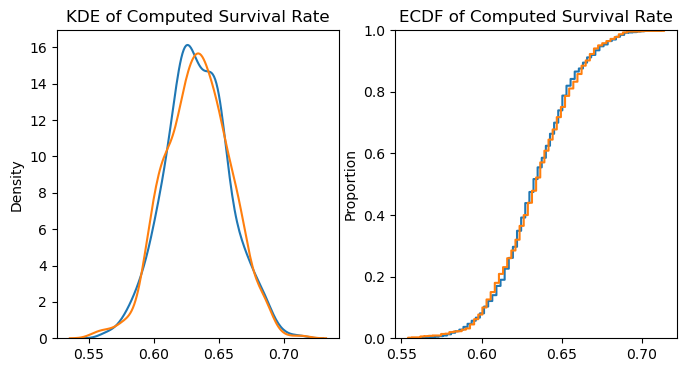

In [34]:
# Plot the KDE With the Bootstrapped Survival Rates
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(CT_Estimates, ax=axes[0]).set(title="KDE of Computed Survival Rate")
sns.kdeplot(IT_Estimates, ax=axes[0])
sns.ecdfplot(CT_Estimates, ax=axes[1]).set(title="ECDF of Computed Survival Rate")
sns.ecdfplot(IT_Estimates, ax=axes[1])
